In [37]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
from sklearn import preprocessing


In [7]:
datafile = "cal_housing_data.csv"

In [8]:
df=pd.read_csv(datafile)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
(df.medianHouseValue == 500001).sum()

965

(array([  877.,  3612.,  4099.,  3771.,  2799.,  1769.,  1239.,   752.,
          479.,  1243.]),
 array([  14999. ,   63499.2,  111999.4,  160499.6,  208999.8,  257500. ,
         306000.2,  354500.4,  403000.6,  451500.8,  500001. ]),
 <a list of 10 Patch objects>)

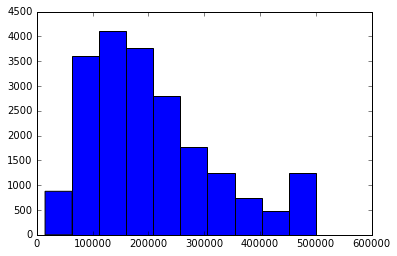

In [13]:
plt.hist(df.medianHouseValue)

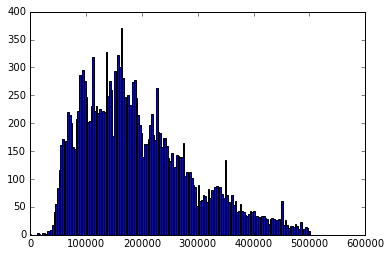

In [18]:
df = df[df['medianHouseValue']<500000]

X=df.loc[:,'longitude':'medianIncome']
y=df['medianHouseValue']
X
plt.hist(df.medianHouseValue,range=[0,600000],bins=200);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 9 columns):
longitude           19648 non-null float64
latitude            19648 non-null float64
housingMedianAge    19648 non-null float64
totalRooms          19648 non-null float64
totalBedrooms       19648 non-null float64
population          19648 non-null float64
households          19648 non-null float64
medianIncome        19648 non-null float64
medianHouseValue    19648 non-null float64
dtypes: float64(9)
memory usage: 1.5 MB


In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

/Users/lingqiangkong/miniconda2/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [23]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
RMSE_lr

62010.025574271393

In [24]:
model_lr.coef_

array([ -3.94080451e+04,  -3.87794184e+04,   1.00199346e+03,
        -8.36039019e+00,   1.08149013e+02,  -3.28844954e+01,
         3.80685490e+01,   3.95762153e+04])

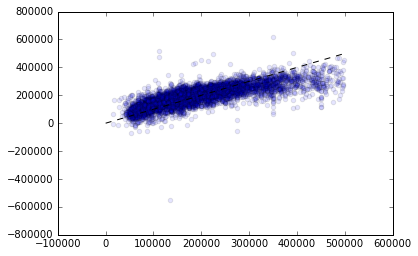

In [26]:
temp = np.linspace(0,500000,500)

plt.scatter(y_test,pred_vals_lr, alpha = .1)
plt.plot(temp,temp,'k--')

In [27]:
model_lr_log = LinearRegression(fit_intercept=True)
model_lr_log.fit(X_train, np.log(y_train))
pred_vals_lr_log = np.exp(model_lr_log.predict(X_test))
RMSE_lr_log = np.sqrt(np.sum((pred_vals_lr_log - y_test)**2)/len(y_test))
RMSE_lr_log

66399.115361212753

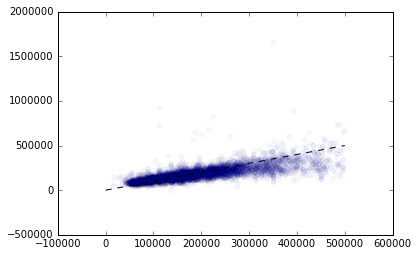

In [28]:
temp = np.linspace(0,500000,500)

plt.scatter(y_test,pred_vals_lr_log, alpha = .03)
plt.plot(temp,temp,'k--')

In [42]:
from sklearn.linear_model import SGDRegressor

In [60]:
# try with SGD regressor
model_sgd = SGDRegressor(loss='squared_loss',n_iter=100,random_state=42)
model_sgd.fit(X_train, y_train)
pred_vals_sgd = model_lr.predict(X_test)
RMSE_sgd = np.sqrt(np.sum((pred_vals_sgd - y_test)**2)/len(y_test))
RMSE_sgd

62010.025574271393

In [29]:
# Try with increasing number of trees
rfmodel1 = RandomForestRegressor(n_estimators = 10, max_features = 3,
                                min_samples_leaf = 5, n_jobs=4)
rfmodel1.fit(X_train,y_train)
pred_vals_rf1 = rfmodel1.predict(X_test)

In [30]:
RMSE_rf1 = np.sqrt(np.sum((pred_vals_rf1 - y_test)**2)/len(y_test))
RMSE_rf1

48032.445481792332

In [31]:
# Try with different max features
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 6,
                                min_samples_leaf = 5, n_jobs=4)
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)

In [32]:
RMSE_rf2 = np.sqrt(np.sum((pred_vals_rf2 - y_test)**2)/len(y_test))
RMSE_rf2

45416.683227129754

In [ ]:
# Try with increasing number of iterations
gbmodel1 = GradientBoostingRegressor(n_estimators = 100, 
                                     learning_rate = .1,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)
pred_vals_gb1 = gbmodel1.predict(X_test)

In [ ]:
RMSE_gb1 = np.sqrt(np.sum((pred_vals_gb1 - y_test)**2)/len(y_test))
RMSE_gb1

In [ ]:
# Try with different depths
gbmodel2 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .1,
                                    max_depth = 7)
gbmodel2.fit(X_train,y_train)
pred_vals_gb2 = gbmodel2.predict(X_test)

In [ ]:
RMSE_gb2 = np.sqrt(np.sum((pred_vals_gb2 - y_test)**2)/len(y_test))
RMSE_gb2

In [ ]:
plt.figure(figsize=(10, 10))

temp = np.linspace(0,500000,500)

plt.subplot(3, 1, 1)
plt.scatter(y_test,pred_vals_lr, alpha = .1)
plt.plot(temp,temp,'k--')

plt.subplot(3, 1, 2)
plt.scatter(y_test,pred_vals_rf2, alpha = .1)
plt.plot(temp,temp)

plt.subplot(3, 1, 3)
plt.scatter(y_test,pred_vals_gb2, alpha = .1)
plt.plot(temp,temp)